In [1]:
import numpy as np
np.__version__

'1.18.5'

In [2]:
import pandas as pd
pd.__version__

'1.0.5'

## Pandas Series
### Constructing Series objects
> pd.Series(data, index=index)

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)
print(data.values)
print(data.index)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
[0.25 0.5  0.75 1.  ]
RangeIndex(start=0, stop=4, step=1)


In [4]:
data = pd.Series(1, index =['a', 'b', 'c', 'd'])
print(data)
data = pd.Series([0.25, 0.5, 0.75, 1.0], index =['a', 'b', 'c', 'd'])
print(data)
print(pd.Series(data, index = ['c','a']))


a    1
b    1
c    1
d    1
dtype: int64
a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
c    0.75
a    0.25
dtype: float64


> When creating pd Series, index array should be the <span style="color:Crimson">same lengths as data array </span>.
>
> *data = pd.Series([0.25, 0.5, 0.75, 1.0], index =['a', 'b'])*  would reture ERROR 
>
> However, we could set index array to indexing a created serise
> 

#### data can be a dictionary, in which index defaults to the sorted dictionary keys

In [5]:
print(pd.Series({2:'a', 1:'b', 3:'c'}))
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
print(area)
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
print(population)

2    a
1    b
3    c
dtype: object
California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


## Pandas DataFrame
### 
#### DataFrame as a generalized NumPy array

In [6]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
print(area)
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
print(population)
states = pd.DataFrame({'population': population, 'area': area})
states

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


#### DataFrame as specialized dictionary

In [7]:
print(states['area'])
print(states['population'])

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64


### Constructing DataFrame objects
#### From a single Series object.

In [8]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


#### From a list of dicts

In [9]:
data = [{'a': i, 'b': 2 * i}
for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


#### From a two-dimensional NumPy array

In [10]:
pd.DataFrame(np.random.rand(3, 2),
columns=['foo', 'bar'],
index=['a', 'b', 'c'])

,foo,bar
a,0.711002,0.703611
b,0.363122,0.310446
c,0.729097,0.040730


#### From a NumPy structured array

In [11]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')],)
print(A)
Data = pd.DataFrame(A)
print(Data)
pd.DataFrame(A,index=['a', 'b', 'c'])

[(0, 0.) (0, 0.) (0, 0.)]
   A    B
0  0  0.0
1  0  0.0
2  0  0.0


,A,B
a,0,0.0
b,0,0.0
c,0,0.0


### The Pandas Index Object

#### Data Selection in Series

In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(data)
print(data['b'])

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5


#### Data Selection in DataFrame

In [13]:
area = pd.Series({'California': 423967, 'Texas': 695662,
'New York': 141297, 'Florida': 170312,
'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127, 'Florida': 19552860,
'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [14]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [15]:
print(data.values)

[[4.23967000e+05 3.83325210e+07 9.04139261e+01]
 [6.95662000e+05 2.64481930e+07 3.80187404e+01]
 [1.41297000e+05 1.96511270e+07 1.39076746e+02]
 [1.70312000e+05 1.95528600e+07 1.14806121e+02]
 [1.49995000e+05 1.28821350e+07 8.58837628e+01]]


In [16]:
print(data.values[0])
print(data.loc["California":"Florida"])
print(data.iloc[0:4])
data.iloc[:3, :2]

[4.23967000e+05 3.83325210e+07 9.04139261e+01]
              area       pop     density
California  423967  38332521   90.413926
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121
              area       pop     density
California  423967  38332521   90.413926
Texas       695662  26448193   38.018740
New York    141297  19651127  139.076746
Florida     170312  19552860  114.806121


,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [17]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [18]:
#Indexers: Series.ix and Series.ix and DataFrame.ix  are deprecated and removed in latest pandas 
#data.ix[:3, :'pop'] 

In [19]:
data.loc[data.density > 100, ['area', 'pop', 'density']]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [20]:
data.loc[data.density > 100, ['area', 'pop', 'density']]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


In [21]:
data.loc[data.density > 100, data.loc['New York'] > 140]

,area,pop
New York,141297,19651127
Florida,170312,19552860


In [22]:
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [23]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [24]:
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


> take care, <span style="color:Crimson">only one row slicing</span> 
>, like data[1], is not correct 

## Operating on Data in Pandas
### UFuncs: Index Alignment

In [25]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
print(A + B)
print(A.add(B, fill_value=0))

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64
0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64


In [26]:
rng = np.random.RandomState(42)
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=['A','B'])
B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('BAC'))
print(A)
print(B)
print(A+B)
fill = A.stack().mean()
print(fill)
A.add(B, fill_value=fill)

    A   B
0   6  19
1  14  10
   B  A  C
0  7  4  6
1  9  2  6
2  7  4  3
      A     B   C
0  10.0  26.0 NaN
1  16.0  19.0 NaN
2   NaN   NaN NaN
12.25


,A,B,C
0,10.00,26.00,18.25
1,16.00,19.00,18.25
2,16.25,19.25,15.25


### Ufuncs: Operations Between DataFrame and Series

In [27]:
rng = np.random.RandomState(42)
A = rng.randint(10, size=(3, 4))
print(A)
A-A[0]

[[6 3 7 4]
 [6 9 2 6]
 [7 4 3 7]]


array([[ 0,  0,  0,  0],
       [ 0,  6, -5,  2],
       [ 1,  1, -4,  3]])

In [28]:
df = pd.DataFrame(A, index=[list('ABC')], columns=list('QRST'))
print(df)
print(df - df.iloc[0])
print(df - df.iloc[0:2])
print(df.iloc[0])
print(df.loc['A'])
print(df - df.loc['A'])

   Q  R  S  T
A  6  3  7  4
B  6  9  2  6
C  7  4  3  7
   Q  R  S  T
A  0  0  0  0
B  0  6 -5  2
C  1  1 -4  3
     Q    R    S    T
A  0.0  0.0  0.0  0.0
B  0.0  0.0  0.0  0.0
C  NaN  NaN  NaN  NaN
Q    6
R    3
S    7
T    4
Name: (A,), dtype: int64
   Q  R  S  T
A  6  3  7  4
     Q    R    S    T
A  0.0  0.0  0.0  0.0
B  NaN  NaN  NaN  NaN
C  NaN  NaN  NaN  NaN


> * df.iloc[n] iPhython native one row slicing support broadcasting rules
>
> * df.iloc[ ] multiple rows slicing and df.loc[ ] <span style="color:Crimson">DO NOT </span> support broadcast, they operate according to  missing data rules

In [29]:
print(df.subtract(df['R'], axis=0))
print(df - df.iloc[:,0:2])

   Q  R  S  T
A  3  0  4  1
B -3  0 -7 -3
C  3  0 -1  3
   Q  R   S   T
A  0  0 NaN NaN
B  0  0 NaN NaN
C  0  0 NaN NaN


In [30]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()

dtype = object
57.9 ms ± 4.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
dtype = int
907 µs ± 37.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
vals1 = np.array([1, None, 3, 4])
print(vals1)
vals2 = np.array([1, np.nan, 3, 4])
print(vals2)
print(vals2.dtype)
print(vals2.sum(), vals2.min(), vals2.max())
print(np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2))

[1 None 3 4]
[ 1. nan  3.  4.]
float64
nan nan nan
8.0 1.0 4.0


In [32]:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3,      5],
                   [np.nan, 4,6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [33]:
print(df.dropna())
print()
print(df.dropna(axis="columns"))
df[3] = np.nan
print()
print(df)
print()
print(df.dropna(axis='columns', how='all'))
print()
print(df.dropna(axis='columns', thresh=3))
print()
print(df.fillna(0))
print()
print(df.fillna(method='ffill', axis=0))

     0    1  2
1  2.0  3.0  5

   2
0  2
1  5
2  6

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN

     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6

   2
0  2
1  5
2  6

     0    1  2    3
0  1.0  0.0  2  0.0
1  2.0  3.0  5  0.0
2  0.0  4.0  6  0.0

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  2.0  4.0  6 NaN


## Hierarchical Indexing
### Methods of MultiIndex Creation

In [34]:
df = pd.DataFrame(np.random.rand(4, 2), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                  columns=['data1', 'data2'])
print(df.columns)
df

Index(['data1', 'data2'], dtype='object')


data1     data2
a 1  0.726368  0.747983
  2  0.274387  0.625457
b 1  0.397097  0.046762
  2  0.948464  0.420995

In [35]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
Data = pd.Series(data)
Data

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

#### MultiIndex level names

In [36]:
Data.index.names = ['state', 'year']
Data

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

#### Explicit MultiIndex constructors

In [37]:
print(pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                                names=['Alpha', 'Num']))
print()
print(pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)],
                               names=['Alpha', 'Num']))
print()
print(pd.MultiIndex.from_product([['a', 'b'], [1, 2]]))
print()
print(pd.MultiIndex(levels=[['a', 'b'], [1, 2]], 
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]]))

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           names=['Alpha', 'Num'])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           names=['Alpha', 'Num'])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )


#### Pandas MultiIndex

In [38]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,18976457, 19378102,20851820, 25145561]
index = pd.MultiIndex.from_tuples(index)
pop = pd.Series(populations, index=index)
print(pop)
pop_df = pop.unstack()
print()
print(pop_df)
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,4687374, 4318033,5906301, 6879014]})
print()
print(pop_df)
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

                2000      2010
California  33871648  37253956
New York    18976457  19378102
Texas       20851820  25145561

                    total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014


,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### Indexing and Slicing a MultiIndex
#### Multiply indexed DataFrames slicing

In [39]:
index = pd.MultiIndex.from_product([[2013, 2014], ['a', 'b']],names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 a      48.0  38.6  39.0  38.9  32.0  36.4
     b      31.0  35.7  40.0  37.0  42.0  36.4
2014 a      32.0  37.6  41.0  36.7  30.0  37.9
     b      46.0  37.2  29.0  36.2  42.0  36.6

In [40]:
print(health_data['Guido', 'HR'])
print()
print(health_data.iloc[:2, :3])
print()
idx = pd.IndexSlice
health_data.loc[idx[:, 'b'], idx[:, 'HR']]


year  visit
2013  a        39.0
      b        40.0
2014  a        41.0
      b        29.0
Name: (Guido, HR), dtype: float64

subject      Bob       Guido
type          HR  Temp    HR
year visit                  
2013 a      48.0  38.6  39.0
     b      31.0  35.7  40.0



,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,b,31.0,40.0,42.0
2014,b,46.0,29.0,42.0


> <span style="color:Crimson">pd.IndexSlice</span> is a good way for multiple indexed DataFrame slicing

### Data Aggregations on Multi-Indices

In [41]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
    for c in cols}
    return pd.DataFrame(data, ind)

In [42]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 a      48.0  38.6  39.0  38.9  32.0  36.4
     b      31.0  35.7  40.0  37.0  42.0  36.4
2014 a      32.0  37.6  41.0  36.7  30.0  37.9
     b      46.0  37.2  29.0  36.2  42.0  36.6

In [43]:
data_mean = health_data.mean(level='year')
print(data_mean)
print()
print(data_mean.mean(axis=1, level='type'))
print()
print(data_mean.mean(axis=1))

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     39.5  37.15  39.5  37.95  37.0  36.40
2014     39.0  37.40  35.0  36.45  36.0  37.25

type         HR       Temp
year                      
2013  38.666667  37.166667
2014  36.666667  37.033333

year
2013    37.916667
2014    36.850000
dtype: float64


## Combining Datasets: Concat and Append

In [44]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [45]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print(pd.concat([df3, df4], axis="columns"))
print(pd.concat([df3, df4]))
print()
print(pd.concat([df3, df4], axis="columns", keys=['df3', 'df24']))
print()
print(pd.concat([df1, df2], keys=['df1', 'df2']))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4
    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
     A    B    C    D
0   A0   B0  NaN  NaN
1   A1   B1  NaN  NaN
0  NaN  NaN   C0   D0
1  NaN  NaN   C1   D1

  df3     df24    
    A   B    C   D
0  A0  B0   C0  D0
1  A1  B1   C1  D1

        A   B
df1 1  A1  B1
    2  A2  B2
df2 3  A3  B3
    4  A4  B4


## Combining Datasets: Merge and Join

In [46]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)
df3 = pd.merge(df1, df2)
df3

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [47]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 
                    'salary': [70000, 80000, 120000, 90000]})
print(df1); print(); print(df3);print();
print(pd.merge(df1,df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [48]:
print(df1.index);print();
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(); print(df2a)

RangeIndex(start=0, stop=4, step=1)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [49]:
print(pd.merge(df1, df2));print();
print(pd.merge(df1a, df2a, left_on="employee", right_on="employee")); print();
print(pd.merge(df1a, df2a, left_index=True, right_index=True));print();
print(df1a.join(df2a));print()

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014

                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014



In [50]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'], 
                    'salary': [70000, 80000, 120000, 90000]})
df3a = df3.set_index('name')
print(df3a);print();
print(pd.merge(df1a, df3, left_index=True, right_on='name'));print()
print(pd.merge(df1, df3a, left_on='employee', right_on='name'))

      salary
name        
Bob    70000
Jake   80000
Lisa  120000
Sue    90000

         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000

  employee        group  salary
0      Bob   Accounting   70000
1     Jake  Engineering   80000
2     Lisa  Engineering  120000
3      Sue           HR   90000


In [51]:
# Following are shell commands to download the data
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
# !curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

In [52]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')
print(pop.head()); print();print(areas.head());  print();print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


## Aggregation and Grouping

In [53]:
import seaborn as sns
planets = sns.load_dataset('planets')
# planets = pd.read_csv('planets.csv')
print(planets.shape)
planets.head(10)

(1035, 6)


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [54]:
planets.isna()

,method,number,orbital_period,mass,distance,year
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1030,False,False,False,True,False,False
1031,False,False,False,True,False,False
1032,False,False,False,True,False,False
1033,False,False,False,True,False,False


In [55]:
planets.dropna(axis=0)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [56]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### GroupBy: Split-Apply-Combine

In [57]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [58]:
print(df.groupby('key').sum())

     data
key      
A       3
B       5
C       7


In [59]:
planets.groupby('method')

In [60]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [61]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [62]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

#### Aggregate, filter, transform, apply

In [63]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'], 
                   'data1': range(6), 
                   'data2': rng.randint(0, 10, 6)}, columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


##### Aggregation
Aggregation allows for even more flexibility.
It can take a string, a function, or a list thereof, and compute all the aggregates at once.

In [64]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [65]:
df.groupby('key').aggregate(['min', 'median', max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [66]:
 df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


##### Filtering 
A filtering operation allows you to drop data based on the group properties.

In [67]:
def filter_func(x):
    return x['data2'].std() > 4 
print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


##### Transforamtion

In [68]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


##### The apply() method. 
The apply() method lets you apply an arbitrary function to the group results

In [69]:
def norm_by_data2(x):
# x is a DataFrame of group values
    x['data1'] /= x['data2'].sum() 
    return x
print(df); 
print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


#### Splitting

In [70]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'} 
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
consonant     12     19
vowel          3      8


In [71]:
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
   data1  data2
a    1.5    4.0
b    2.5    3.5
c    3.5    6.0


In [72]:
df2.groupby([df2.index, mapping]).mean()

,,data1,data2
key,,,
A,vowel,1.5,4.0
B,consonant,2.5,3.5
C,consonant,3.5,6.0


In [73]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Pivot Tables

In [74]:
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [75]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [76]:
 titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [77]:
age = pd.cut(titanic['age'], [0, 18, 80]) 
print(titanic.pivot_table('survived', ['sex', age], 'class'))
titanic.pivot_table('survived', index=['sex', age], columns='class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [78]:
age = pd.qcut(titanic['age'], 2) 
titanic.pivot_table('survived', ['sex', age], 'class')

class                    First    Second     Third
sex    age                                        
female (0.419, 28.0]  0.931034  0.921053  0.520548
       (28.0, 80.0]   0.982143  0.916667  0.310345
male   (0.419, 28.0]  0.565217  0.227273  0.161290
       (28.0, 80.0]   0.346154  0.090909  0.132653

In [79]:
age = pd.cut(titanic['age'], [0, 18, 80]) 
fare = pd.qcut(titanic['fare'], 2) 
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [80]:
# shell command to download the data:
#!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [81]:
births = pd.read_csv('births.csv')
births.head(10)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
5,1969,1,3.0,M,4994
6,1969,1,4.0,F,4440
7,1969,1,4.0,M,4520
8,1969,1,5.0,F,4192
9,1969,1,5.0,M,4198


In [82]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='mean')

gender,F,M
decade,,
1960,4566.755208,4808.781250
1970,4267.403569,4497.386393
1980,5460.886072,5740.886635
1990,162328.783333,170171.275000
2000,168789.898148,176911.370370


In [83]:
births['decade'] = 10 * (births['year'] // 10)
births['decade'] = births['decade'].astype(str) + 's'
births.pivot_table('births', index='decade', columns='gender', aggfunc='mean')

gender,F,M
decade,,
1960s,4566.755208,4808.781250
1970s,4267.403569,4497.386393
1980s,5460.886072,5740.886635
1990s,162328.783333,170171.275000
2000s,168789.898148,176911.370370


(40, 2)


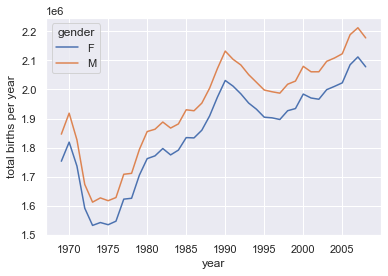

In [84]:
import matplotlib.pyplot as plt
sns.set() # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot() 
plt.ylabel('total births per year');
birth_rate=births.pivot_table('births', index='year', columns='gender', aggfunc='sum')
print(birth_rate.shape)

## Vectorized String Operation
len() lower() ljust() upper() rjust() find() center() rfind() zfill() index() strip() rindex() rstrip() capitalize() lstrip() swapcase()
translate()
startswith()
endswith()
isalnum()
isalpha()
isdigit()
isspace()
istitle()
islower()
isupper()
isnumeric()
isdecimal()
split()
rsplit()
partition()
rpartition()

In [85]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam', 'Eric Idle', 
                   'Terry Jones', 'Michael Palin'])

In [86]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [87]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [88]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [89]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')
# [^AEIOU] means not AEIOU

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

In [90]:
print(monte.str.slice(0,3))
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object


0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [91]:
print(monte.str.split())
monte.str.split().str.get(-1)

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object


0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

## Time Series

### Pandas Time Series: Indexing by Time

In [97]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04', '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index, name='date') 
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
Name: date, dtype: int64

In [98]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
Name: date, dtype: int64

In [95]:
data['2015']

2015-07-04    2
2015-08-04    3
Name: date, dtype: int64

In [104]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), 
                        '4th of July, 2015', 
                        '2015-Jul-6', 
                        '07-07-2015', 
                        '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [105]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [120]:
pd.date_range('2015-07-03', periods=8, freq='D')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [131]:
pd.date_range('2015-07-03', periods=8, freq='W-Fri')

DatetimeIndex(['2015-07-03', '2015-07-10', '2015-07-17', '2015-07-24',
               '2015-07-31', '2015-08-07', '2015-08-14', '2015-08-21'],
              dtype='datetime64[ns]', freq='W-FRI')

In [110]:
pd.period_range('2015-07-03', periods=8, freq='H')

PeriodIndex(['2015-07-03 00:00', '2015-07-03 01:00', '2015-07-03 02:00',
             '2015-07-03 03:00', '2015-07-03 04:00', '2015-07-03 05:00',
             '2015-07-03 06:00', '2015-07-03 07:00'],
            dtype='period[H]', freq='H')

In [111]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [117]:
pd.timedelta_range(0, periods=10, freq='D')

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days',
                '6 days', '7 days', '8 days', '9 days'],
               dtype='timedelta64[ns]', freq='D')

In [118]:
pd.tseries.offsets.__all__

['Day',
 'BusinessDay',
 'BDay',
 'CustomBusinessDay',
 'CDay',
 'CBMonthEnd',
 'CBMonthBegin',
 'MonthBegin',
 'BMonthBegin',
 'MonthEnd',
 'BMonthEnd',
 'SemiMonthEnd',
 'SemiMonthBegin',
 'BusinessHour',
 'CustomBusinessHour',
 'YearBegin',
 'BYearBegin',
 'YearEnd',
 'BYearEnd',
 'QuarterBegin',
 'BQuarterBegin',
 'QuarterEnd',
 'BQuarterEnd',
 'LastWeekOfMonth',
 'FY5253Quarter',
 'FY5253',
 'Week',
 'WeekOfMonth',
 'Easter',
 'Hour',
 'Minute',
 'Second',
 'Milli',
 'Micro',
 'Nano',
 'DateOffset']

## High-Performance Pandas: eval() and query()

In [132]:
df.values.nbytes

144